# ARIMA Model for Time Series Analysis and Prediction

## Stationarity Check

a) Check whether the data is stationary or not. 

b) Transform the data if the graph is not stationary, so it is weakly stationary.


#### Note: Adfuller test by itself is not sufficient to check for stationarity. 

In [1]:
import csv
import pandas as pd
df = pd.read_csv('lusmelec.csv')
df.head()

,dtm,logx
0,4/5/2016,5.076535
1,5/5/2016,4.966607
2,6/5/2016,4.998279
3,7/5/2016,4.938702
4,8/5/2016,4.993116


<AxesSubplot:title={'center':'Data'}>

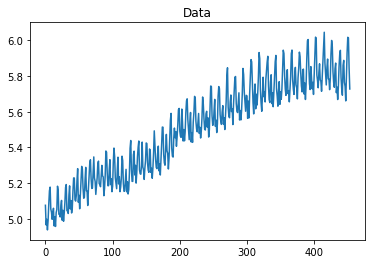

In [2]:
df['logx'].plot(title="Data")

In [3]:
from statsmodels.tsa.stattools import adfuller  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print ('Dickey-Fuller p-value = '+str(adfuller(df['logx'])[1])) 

Dickey-Fuller p-value = 0.4378385822922776


Since p is large and much greater than 0.05, the data is not stationary

In [4]:
import statistics
#mean
print(statistics.mean(df['logx'][:20]))
print(statistics.mean(df['logx'][-30:-10]))

#variance
print(statistics.variance(df['logx'][:20]))
print(statistics.variance(df['logx'][-30:-10]))

5.04706031435
5.8171098056
0.005567986629951481
0.009456841605496884


From the mean and variance calculation, we can see that the mean and variance are not constant and not less than infinity for 2 sections of the data. Thus, the data does not have weak stationarity.

In [5]:
import numpy as np
from scipy.stats import kurtosis, skew
print("First Moment (mean) of the data  =",np.mean(df['logx']))
print("Second Moment (var) of the data  =",np.var(df['logx']))
print("Third Moment (skew) of the data  =",skew(df['logx'], axis=0, bias=True))
print("Fourth Moment (kurtosis) of the data  =",kurtosis(df['logx'], axis=0, bias=True))

First Moment (mean) of the data  = 5.5015945611211485
Second Moment (var) of the data  = 0.07357991535708808
Third Moment (skew) of the data  = -0.1378125462099482
Fourth Moment (kurtosis) of the data  = -1.1003950384105805


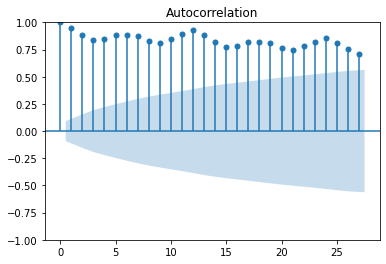

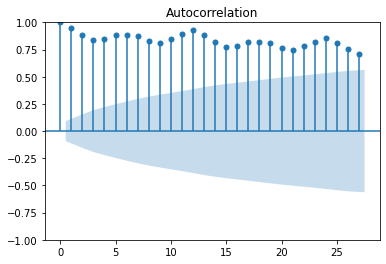

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['logx'])

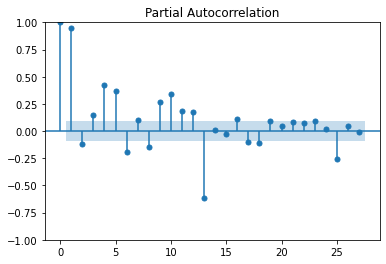

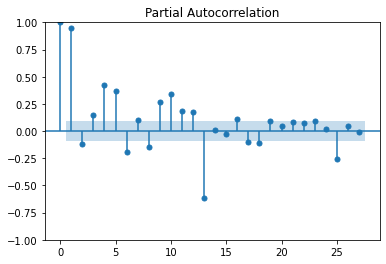

In [7]:
plot_pacf(df['logx'],method='ywm')

In [8]:
#Pairwise Differencing
df['differenced'] = df['logx']-df['logx'].shift() #shift() is pairwise differencing
df.head()

,dtm,logx,differenced
0,4/5/2016,5.076535,NaN
1,5/5/2016,4.966607,-0.109929
2,6/5/2016,4.998279,0.031672
3,7/5/2016,4.938702,-0.059577
4,8/5/2016,4.993116,0.054414


To remove the "NaN" in the first row resulting from differencing with a data shift:

In [9]:
df = df.dropna()
df.head()

,dtm,logx,differenced
1,5/5/2016,4.966607,-0.109929
2,6/5/2016,4.998279,0.031672
3,7/5/2016,4.938702,-0.059577
4,8/5/2016,4.993116,0.054414
5,9/5/2016,5.082919,0.089803


In [10]:
print ('Dickey-Fuller p-value = '+str(adfuller(df['differenced'])[1]))

Dickey-Fuller p-value = 1.0620216333173687e-05


Since p < 0.05, the data has weak stationarity. We can do further checks by plotting the data:

<AxesSubplot:title={'center':'Data - Pairwise differencing'}>

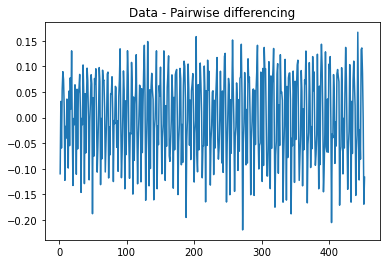

In [11]:
df['differenced'].plot(title="Data - Pairwise differencing")

We can also check using the moments of the data:

In [12]:
print("First Moment (mean) of the data  =",np.mean(df['differenced']))
print("Second Moment (var) of the data  =",np.var(df['differenced']))
print("Third Moment (skew) of the data  =",skew(df['differenced'], axis=0, bias=True))
print("Fourth Moment (kurtosis) of the data  =",kurtosis(df['differenced'], axis=0, bias=True))

First Moment (mean) of the data  = 0.0014359563796909503
Second Moment (var) of the data  = 0.00714158207855123
Third Moment (skew) of the data  = -0.3388368033078883
Fourth Moment (kurtosis) of the data  = -0.8285935156266007


All the values have gotten closer to 0. The data is now weak stationarity.

Let's now take a look at the ACF and PACF.

We will check the various results against the Table below from Massimo Guidolin's Time Series for Financial Apllications. 

| |ACF | PACF |
|---|---|---|
|AR(p)|Decays toward 0|Cut off after lag p
|MA(q)|Cuts off after lag q|Decays Toward 0
|ARMA(p,q)|Decays toward 0 starting at lag q|Decays toward 0 starting at lag p|

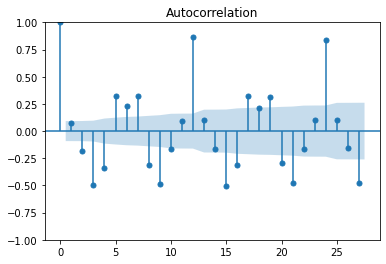

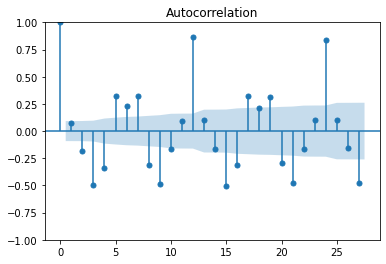

In [13]:
plot_acf(df['differenced'])

From the ACF above, it seems unclear if AR(p) decays to 0, but MA(q) cuts off after lag p =3,12,15,21,24,27.

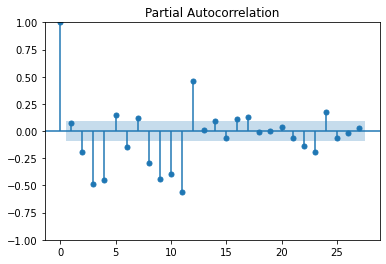

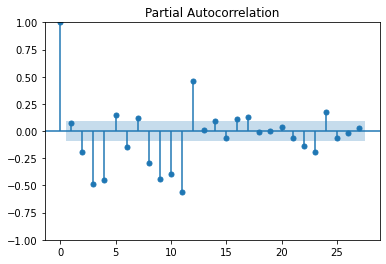

In [14]:
plot_pacf(df['differenced'],method='ywm')

From the PACF above, AR(p) cuts off after lag (p = 12) and MA(q) decays to 0.

### Simple process simulation

Using the numpy library, create the following time series process.

Afterwards, plot the ACF and PACF charts on the simulated time series data.

### MA(3)

$\mu=0$

$\theta_1 =0.4$

$\theta_2 =−0.3$ 

$\theta_3 =−0.5$

Bonus: challenge yourself to create a function that can take in a list of 𝜃 values.

### Explanation

Moving Average equation is given as

$$x_t = \mu + \sum_{i=1}^{i=p}\theta_i e_{t-i} + e_t$$

Assuming $\mu = 0$, re-write as follows

$$x_{t} = \sum_{i = 0}^{i = p}{\theta_{i}e_{t - i}}$$

It is easier to observe the pattern by writing out a few rows in the sequence.

$$x_{3} = \theta_{0}e_{3} + \theta_{1}e_{2} + \theta_{2}e_{1} + \theta_{3}e_{0}$$

$$x_{4} = \theta_{0}e_{4} + \theta_{1}e_{3} + \theta_{2}e_{2} + \theta_{3}e_{1}$$

Re-writing as matrix form

$$\begin{pmatrix}
x_{3} \\
 \vdots \\
x_{t} \\
\end{pmatrix} = \begin{pmatrix}
e_{3} & \cdots & e_{0} \\
 \vdots & \ddots & \vdots \\
e_{t} & \cdots & e_{t - 1} \\
\end{pmatrix}\begin{pmatrix}
\begin{matrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\end{matrix} \\
\theta_{3} \\
\end{pmatrix}$$

The matrix in the middle is a sliding window of the error terms. The numpy library is be used to generate such a sliding window.

In [15]:
df.tail() #to check last row 

,dtm,logx,differenced
449,27/7/2017,5.929855,0.136208
450,28/7/2017,6.016089,0.086234
451,29/7/2017,6.013131,-0.002958
452,30/7/2017,5.843730,-0.169401
453,31/7/2017,5.727024,-0.116706


To create an MA process of order 3, using the formula $x_t = \mu + \sum_{i=1}^{i=p}\theta_i \epsilon_{t-i} + \epsilon_t$

In [16]:
ma3_process = np.zeros(453)

x = df.to_numpy()

for i in range(0,453): 
    ma3_process[i] = 0.4 * x[i-1][2]  + (-0.3) * x[i-2][2] + (-0.5) * x[i-3][2] + x[i][2]# using parameters \theta_1 = 0.4 \theta_2 = -0.3 \theta_3 = -0.5

# print(ma3_process)

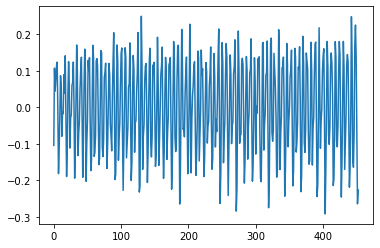

In [17]:
import matplotlib.pyplot as plt
plt.plot(ma3_process)

We will check the various results against the Table below from Massimo Guidolin's Time Series for Financial Apllications. 

| |ACF | PACF |
|---|---|---|
|AR(p)|Decays toward 0|Cut off after lag p
|MA(q)|Cuts off after lag q|Decays Toward 0
|ARMA(p,q)|Decays toward 0 starting at lag q|Decays toward 0 starting at lag p|

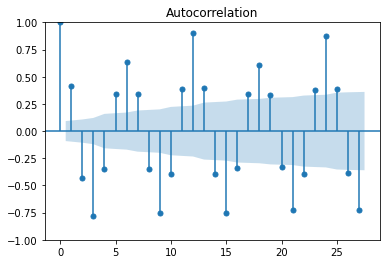

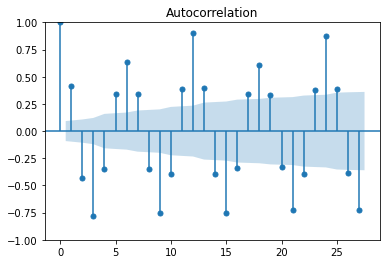

In [18]:
plot_acf(ma3_process)

From ACF, though the results are cryptic, we can see the correlations in the first 3 lags of the MA(3) process. Indeed they cut of after lag 3 for the ma3_process. 

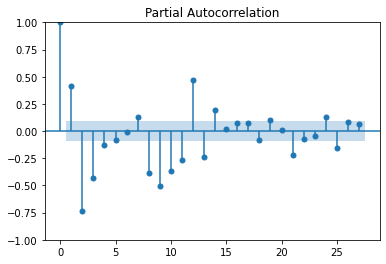

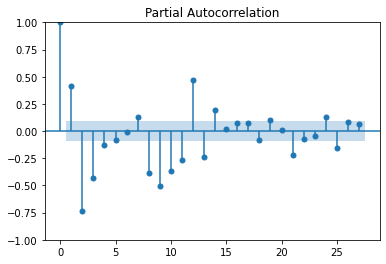

In [19]:
plot_pacf(ma3_process,method='ywm')

From PACF, the MA(q) decays over time.

In [20]:
#BONUS
ma3_process = np.zeros(453)

x = df.to_numpy()

tetta_list = [0.4, -0.3, -0.5]

for i in range(len(x)):
    tetta_value = 0
    for j in range(len(tetta_list)):
        tetta_value += tetta_list[j]* x[i-1-j][2]
    print(i)    
    ma3_process[i] =  tetta_value + x[i][2]      
        
print(ma3_process)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Get ACF and PACF for ARMA datasets

Using the following datasets:
- ARMA1.csv
- ARMA2.csv

Plot the ACF and PACF graphs and deduce how the p and q values from autoregression (A.R.) and moving average (M.A.) parameters that generate the time series data. 

In [21]:
ARMA1 = pd.read_csv('ARMA1.csv')
ARMA2 = pd.read_csv('ARMA2.csv')

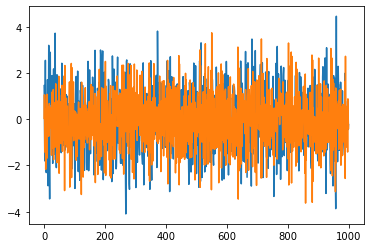

In [22]:
plt.plot(ARMA1['x'])
plt.plot(ARMA2['x'])

These plots are looking less stationary.

To check with Dickey-Fuller tests:

In [23]:
print ('Dickey-Fuller p-value = '+str(adfuller(ARMA1['x']))) 
print ('Dickey-Fuller p-value = '+str(adfuller(ARMA2['x'])))

Dickey-Fuller p-value = (-37.37596165434848, 0.0, 1, 998, {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}, 2774.7604245021084)
Dickey-Fuller p-value = (-13.60270450748962, 1.9394131648514633e-25, 3, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 2716.7459834246747)


Let's look at the ACF and PACF.

From the plot above, we expect that the the ACF will decay toward zero starting at lag $q$ and the PACF will decay toward 0 starting at lag $p$.

We will check the various results against the Table below from Massimo Guidolin's Time Series for Financial Apllications. 

| |ACF | PACF |
|---|---|---|
|AR(p)|Decays toward 0|Cut off after lag p
|MA(q)|Cuts off after lag q|Decays Toward 0
|ARMA(p,q)|Decays toward 0 starting at lag q|Decays toward 0 starting at lag p|

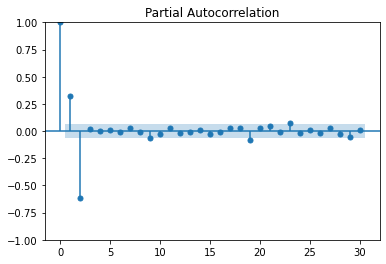

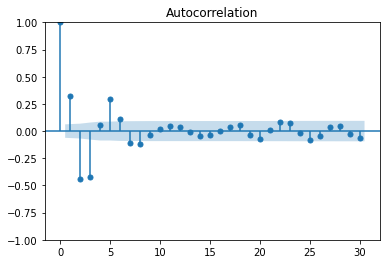

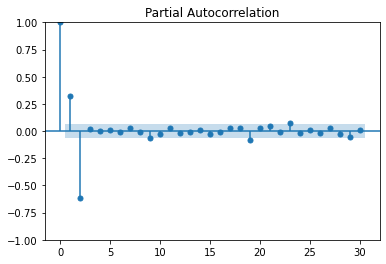

In [24]:
plot_acf(ARMA1['x'])
plot_pacf(ARMA1['x'],method='ywm')

From the ACF, values seem to be decaying after lag 5 (can also be 2). 
From the PACF, values are decaying after lag 2.

For ARMA1, p = 2, q =5 (or 2).

For ARMA1, We can use p=1 and q=2 to get the cofficients for the ARMA model below:

In [25]:
from statsmodels.tsa.arima.model import ARIMA        #import the model from statstools
model = ARIMA(ARMA1['x'], order=(2,1,5))    
model_fit = model.fit()                              #fit the model
print(model_fit.summary())  

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 1000
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -1424.781
Date:                Sun, 28 May 2023   AIC                           2865.561
Time:                        20:19:51   BIC                           2904.815
Sample:                             0   HQIC                          2880.481
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4774      0.085      5.611      0.000       0.311       0.644
ar.L2         -0.6232      0.052    -12.077      0.000      -0.724      -0.522
ma.L1         -0.9363      0.369     -2.534      0.0

c:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


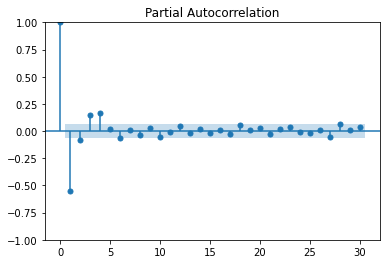

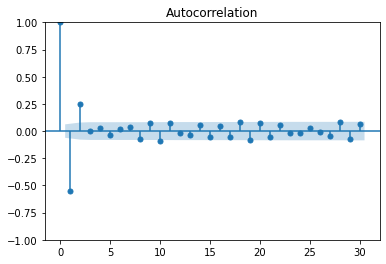

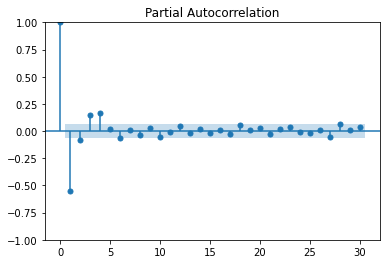

In [26]:
plot_acf(ARMA2['x'])
plot_pacf(ARMA2['x'],method='ywm')

From the ACF, values seem to be decaying after lag 2. 
From the PACF, values are decaying after lag 1.

For ARMA2, p = 1, q =2.

For ARMA2, We can use p=1 and q=2 to get the cofficients for the ARMA model below:

In [27]:
from statsmodels.tsa.arima.model import ARIMA        #import the model from statstools
model = ARIMA(ARMA2['x'], order=(1,1,2))    
model_fit = model.fit()                              #fit the model
print(model_fit.summary())  

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 1000
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1413.333
Date:                Sun, 28 May 2023   AIC                           2834.666
Time:                        20:19:52   BIC                           2854.293
Sample:                             0   HQIC                          2842.126
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4859      0.049     -9.831      0.000      -0.583      -0.389
ma.L1         -1.0931      0.057    -19.152      0.000      -1.205      -0.981
ma.L2          0.1035      0.057      1.819      0.0

## Effect of p and q values on metrics to determine choice of model

a) Fit different combinations of p and q in the below table and examine the AIC, BIC, HQIC and any other parameters of interest.

b) Which diagnostic value is more sensitive to over-fitting or under-fitting?
#### Note:
Use the synthetically generated time series dataset arma202.csv. The ground truth is ARMA(2, 2).  So AIC, BIC and HQIC is expected be the lowest here.


p---q-------AIC------BIC-----HQIC --------AIC%-----BIC%----HQIC%----observations -------- Comment

1 | 0 | 3342.22 | 3347.13 | 3344.08 | 

2 | 0 | 2960.65 | 2970.47 | 2964.38 | 

3 | 0 | 2926.40 | 2941.12 | 2931.99 | 

4 | 0 | 2916.33 | 2935.96 | 2923.79 | 

0 | 1 | 3484.27 | 3489.17 | 3486.13 | 

1 | 1 | 3041.18 | 3051.00 | 3044.91 | 

2 | 1 | 2939.18 | 2953.91 | 2944.78 | 

3 | 1 | 2922.96 | 2942.60 | 2930.43 | 

4 | 1 | 2903.72 | 2928.26 | 2913.04 | 

0 | 2 | 3024.83 | 3034.65 | 3028.56 | 

1 | 2 | 2909.98 | 2924.70 | 2915.58 | 

2 | 2 | 2898.80 | 2918.43 | 2906.26 | 

3 | 2 | 2900.40 | 2924.94 | 2909.73 | 

4 | 2 | 2901.84 | 2931.29 | 2913.03 | 

0 | 3 | 2909.28 | 2924.00 | 2914.88 | 

1 | 3 | 2900.80 | 2920.43 | 2908.26 | 


### Explanation: 
For the given specification fit the modle and compare the AIC, BIC and HQIC values to choose the best model.

* Akaike's Information Criterion (1973) formulated as $\ln(\hat \sigma^2) + \frac{2k}{T}$, where $\hat \sigma^2$ is the variance in the residual (  $ \text{res} = \frac{1}{T} \sum _{i=1}^T \hat \epsilon_i^2) $, $T$ is the number of samples used, and $k$ is the total number of paramters to be estimated, for example $p+q$ in our notation above. 

* Schwarz's Bayesian Information Criterion (1978) formulated as $SBIC=\ln (\hat \sigma^2 ) + \frac{2k}{T} \ln(T)$, with the same parameters as AIC. 

* Hannan-Quinn's Information Criterion (1979) formulated as $HQIC = \ln ( \hat \sigma^2 )+ \frac{2k}{T} \ln ( \ln (T)) $

In [28]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [29]:
ARMA202 = pd.read_csv('arma202.csv')
ARMA202.head()

,date,x
0,23 Apr 2020,-0.107021
1,24 Apr 2020,-0.603903
2,25 Apr 2020,2.043527
3,26 Apr 2020,3.078618
4,27 Apr 2020,3.494095


In [30]:
ARMA202.tail()

,date,x
995,13 Jan 2023,-3.262289
996,14 Jan 2023,-3.962051
997,15 Jan 2023,-3.119307
998,16 Jan 2023,-1.548157
999,17 Jan 2023,-3.247997


We can use first 500 data as test data and last 500 data as training data to test over/underfitting of the models.

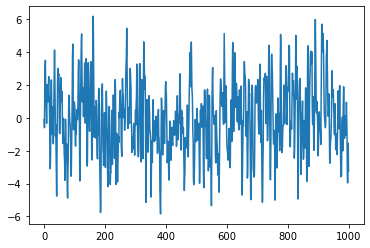

In [31]:
plt.plot(ARMA202['x'])

In [32]:
from statsmodels.tsa.stattools import adfuller  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print ('Dickey-Fuller p-value = '+str(adfuller(ARMA202['x'])[1])) 

Dickey-Fuller p-value = 1.6627400614028081e-18


Since p<0.05, the data is stationary.

We can also check the moments of the data:

In [33]:
print("First Moment (mean) of the data  =",np.mean(ARMA202['x']))
print("Second Moment (var) of the data  =",np.var(ARMA202['x']))
print("Third Moment (skew) of the data  =",skew(ARMA202['x'], axis=0, bias=True))
print("Fourth Moment (kurtosis) of the data  =",kurtosis(ARMA202['x'], axis=0, bias=True))

First Moment (mean) of the data  = -0.06401212432599998
Second Moment (var) of the data  = 4.466228500090158
Third Moment (skew) of the data  = 0.10670799730255624
Fourth Moment (kurtosis) of the data  = -0.17201568443849613


**ARIMA Model**

In [34]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame()
df1['p'] = [1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1]
df1['q'] = [0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3]
df1

,p,q
0,1,0
1,2,0
2,3,0
3,4,0
4,0,1
5,1,1
6,2,1
7,3,1
8,4,1
9,0,2


In [35]:
# assume d=1
from statsmodels.tsa.arima.model import ARIMA        #import the model from statstools
for i in df1.index:
    model = ARIMA(ARMA202['x'][:500], order=(df1['p'][i],1,df1['q'][i]))  #use first 500 values as test data, next 500 values as training data
    model_fit = model.fit()                              #fit the model
    print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  500
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -810.812
Date:                Sun, 28 May 2023   AIC                           1625.624
Time:                        20:19:54   BIC                           1634.049
Sample:                             0   HQIC                          1628.930
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3794      0.042      8.929      0.000       0.296       0.463
sigma2         1.5092      0.100     15.030      0.000       1.312       1.706
Ljung-Box (L1) (Q):                   9.38   Jarque-

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  500
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -730.349
Date:                Sun, 28 May 2023   AIC                           1472.698
Time:                        20:19:56   BIC                           1497.973
Sample:                             0   HQIC                          1482.617
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3518      0.210      1.677      0.094      -0.059       0.763
ar.L2          0.3979      0.240      1.660      0.097      -0.072       0.868
ar.L3         -0.5041      0.117     -4.300      0.0

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  500
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -722.379
Date:                Sun, 28 May 2023   AIC                           1458.759
Time:                        20:19:58   BIC                           1488.247
Sample:                             0   HQIC                          1470.331
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7460      0.176      4.229      0.000       0.400       1.092
ar.L2          0.0725      0.215      0.338      0.735      -0.348       0.493
ar.L3         -0.4422      0.109     -4.061      0.0

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  500
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -724.447
Date:                Sun, 28 May 2023   AIC                           1458.893
Time:                        20:19:58   BIC                           1479.957
Sample:                             0   HQIC                          1467.159
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4331      0.055      7.870      0.000       0.325       0.541
ma.L1         -0.1556      0.058     -2.672      0.008      -0.270      -0.041
ma.L2         -0.3545      0.038     -9.296      0.0

Populating the dataframe:

In [36]:
df1['AIC'] =[1625.624, 1558.243, 1513.991, 1515.791, 1603.862, 1602.062, 1471.645, 1471.377, 1516.578, 1587.638, 1525.740, 1472.206, 1472.698, 1458.759, 1497.808, 1458.893]
df1['BIC'] =[1634.049, 1570.881, 1530.842, 1536.854, 1612.287, 1614.700, 1488.495, 1492.440, 1541.854, 1600.276, 1542.590, 1493.269, 1497.973, 1488.247, 1514.658, 1479.957]
df1['HQIC'] =[1628.930, 1563.203, 1520.604, 1524.057, 1607.169, 1607.022, 1478.258, 1479.643, 1526.497, 1592.597, 1532.352, 1480.472, 1482.617, 1470.331, 1504.421, 1467.159]
df1

,p,q,AIC,BIC,HQIC
0,1,0,1625.624,1634.049,1628.930
1,2,0,1558.243,1570.881,1563.203
2,3,0,1513.991,1530.842,1520.604
3,4,0,1515.791,1536.854,1524.057
4,0,1,1603.862,1612.287,1607.169
5,1,1,1602.062,1614.700,1607.022
6,2,1,1471.645,1488.495,1478.258
7,3,1,1471.377,1492.440,1479.643
8,4,1,1516.578,1541.854,1526.497
9,0,2,1587.638,1600.276,1592.597


In [37]:
# #if use all 1000 data for test
# df1['AIC'] =[3270.266, 3089.287, 3027.661, 3029.655, 3205.761, 3198.451, 2954.759, 3028.786, 3027.537, 3168.346, 3046.892, 2940.127, 2957.611, 2908.618, 3014.810, 2915.248]
# df1['BIC'] =[3280.080, 3104.008, 3047.288, 3054.188, 3215.574, 3213.172, 2974.386, 3053.320, 3056.978, 3183.066, 3066.519, 2964.660, 2987.052, 2942.965, 3034.437, 2939.782]
# df1['HQIC'] =[3273.996, 3094.882, 3035.121, 3038.980, 3209.491, 3204.046, 2962.219, 3038.111, 3038.727, 3173.941, 3054.352, 2949.452, 2968.801, 2921.673, 3022.270, 2924.573]
# df1

To calculate percentage difference of AIC, BIC, HQIC from ground truth values of ARMA(2,2):

In [38]:
#ground truth: index = 11
gt_AIC = df1['AIC'][11]
gt_BIC = df1['BIC'][11]
gt_HQIC = df1['HQIC'][11]

AICpercent_list =[]
BICpercent_list =[]
HQICpercent_list =[]
for i in df1.index:
    AICpercent_list.append((df1['AIC'][i]-gt_AIC)/gt_AIC)
    BICpercent_list.append((df1['BIC'][i]-gt_BIC)/gt_BIC)
    HQICpercent_list.append((df1['HQIC'][i]-gt_HQIC)/gt_HQIC)
df1['AIC%'] = AICpercent_list
df1['BIC%'] = BICpercent_list
df1['HQIC%'] = HQICpercent_list
df1

,p,q,AIC,BIC,HQIC,AIC%,BIC%,HQIC%
0,1,0,1625.624,1634.049,1628.930,0.104210,0.094276,0.100277
1,2,0,1558.243,1570.881,1563.203,0.058441,0.051975,0.055882
2,3,0,1513.991,1530.842,1520.604,0.028383,0.025162,0.027108
3,4,0,1515.791,1536.854,1524.057,0.029605,0.029188,0.029440
4,0,1,1603.862,1612.287,1607.169,0.089428,0.079703,0.085579
5,1,1,1602.062,1614.700,1607.022,0.088205,0.081319,0.085479
6,2,1,1471.645,1488.495,1478.258,-0.000381,-0.003197,-0.001495
7,3,1,1471.377,1492.440,1479.643,-0.000563,-0.000555,-0.000560
8,4,1,1516.578,1541.854,1526.497,0.030140,0.032536,0.031088
9,0,2,1587.638,1600.276,1592.597,0.078408,0.071660,0.075736


**Analysis of Results**

Since AIC, BIC and HQIC  are information criterion (IC) to determine the strength of the linear regression models and would punish the models for adding parameters which increases complexity, lower AIC, BIC and HQIC values are simpler and better. Thus, we can find the minimum AIC, BIC and HQIC and corresponding p,q values to check if they correspond to the ground case p,q = (2,2) mentioned in the question:

In [39]:
min(df1['AIC'])

print('Index with the lowest AIC value:', df1[df1['AIC'] == min(df1['AIC'])].index.values)
print('Lowest AIC value for: p, q = ', df1['p'][13], ',', df1['q'][13])




Index with the lowest AIC value: [13]
Lowest AIC value for: p, q =  4 , 2


In [40]:
min(df1['BIC'])
print('Index with the lowest BIC value:', df1[df1['BIC'] == min(df1['BIC'])].index.values)
print('Lowest BIC value for: p, q = ', df1['p'][15], ',', df1['q'][15])

Index with the lowest BIC value: [15]
Lowest BIC value for: p, q =  1 , 3


In [41]:
min(df1['HQIC'])
print('Index with the lowest HQIC value:', df1[df1['HQIC'] == min(df1['HQIC'])].index.values)
print('Lowest HQIC value for: p, q = ', df1['p'][13], ',', df1['q'][13])

Index with the lowest HQIC value: [15]
Lowest HQIC value for: p, q =  4 , 2


Since the lowest AIC and HQIC aligns to the same model p,q = (4,2), ARMA(4,2) should be the best model, but we have diverged from the ground truth of ARMA(2,2). To examine the difference from the ground truth:

In [42]:
#ground truth: index = 11

#AIC
print('AIC percentage difference from ground truth: ', df1['AIC%'][13])

#BIC
print('BIC percentage difference from ground truth: ', df1['BIC%'][13])

#HQIC
print('HQIC percentage difference from ground truth: ', df1['HQIC%'][13])


AIC percentage difference from ground truth:  -0.00913391196612423
BIC percentage difference from ground truth:  -0.0033630913117461986
HQIC percentage difference from ground truth:  -0.006849842482667742


Since the percentage difference for all AIC, BIC and HQIC for ARMA(4,2) is within 1% difference from the ground truth of ARMA (2,2), we can conclude that ARMA(4,2) is the best model for predicting future data.

**To examine over/underfitting:**

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
model22 = ARIMA(ARMA202['x'][500:], order=(2,1,2))  #use first 500 values as test data, next 500 values as training data
model_fit22 = model22.fit()                              #fit the model


model42 = ARIMA(ARMA202['x'][500:], order=(4,1,2))  
model_fit42 = model42.fit()   

model13 = ARIMA(ARMA202['x'][500:], order=(1,1,3))  
model_fit13 = model13.fit()   

# line plot of residuals
residuals22 = pd.DataFrame(model_fit22.resid) #ground truth
residuals42 = pd.DataFrame(model_fit42.resid) #AIC, HQIC
residuals13 = pd.DataFrame(model_fit13.resid) #BIC

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


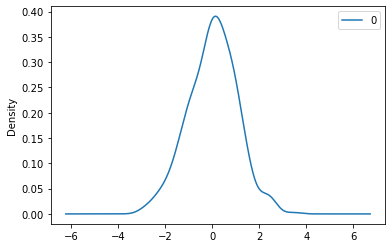

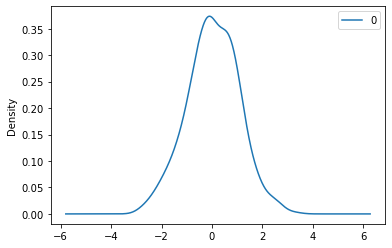

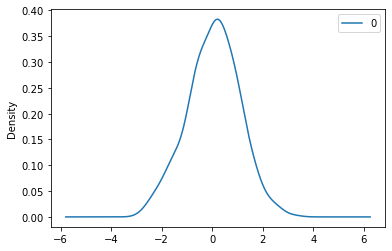

                0
count  500.000000
mean     0.010838
std      1.044620
min     -3.000652
25%     -0.661109
50%      0.054066
75%      0.733550
max      3.473171
                0
count  500.000000
mean     0.038931
std      1.028460
min     -2.782390
25%     -0.619191
50%      0.011542
75%      0.761412
max      3.253765
                0
count  500.000000
mean     0.045637
std      1.035631
min     -2.784688
25%     -0.613673
50%      0.106230
75%      0.731409
max      3.238714


In [44]:
# density plot of residuals
residuals22.plot(kind='kde')
residuals42.plot(kind='kde')
residuals13.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals22.describe())
print(residuals42.describe())
print(residuals13.describe())

## Application on Stock Price Data from Yahoo! Finance

Using BAC, BAK, AAPL, and MSFT, find the best pair of securities (e.g., AAPL-MSFT, AAPL-BAC, etc.)  that will yield the lowest out-of-sample MSE.

Does the pearson correlation coefficient (by itself) provide guidance on the best pair to select?

#### Note:

After performing VAR, how do we choose the securities?

To make the problem manageable, perform pairwise VAR for the different pair combinations from [AAPL, MSFT, BAK, BAC].

In general, you should be able to obtain the output as shown below and thus infer that the Pearson correlation coefficient by itself does not necessarily provide a clear guide to choosing any two securities to fit in a VAR. Thus, curiosity is piqued to find out more about VAR.

<table style='border-collapse:collapse' border=1>
<tbody>
<tr>
<td>
<p><strong>security_1</strong></p>
</td>
<td>
<p><strong>security_2</strong></p>
</td>
<td>
<p><strong>correlation</strong></p>
</td>
<td>
<p><strong>test MSE for security_1</strong></p>
</td>
<td>
<p><strong>test MSE for security_2</strong></p>
</td>
</tr>
<tr>
<td>
<p>AAPL</p>
</td>
<td>
<p>MSFT</p>
</td>
<td>
<p>0.8861</p>
</td>
<td>
<p>46.3093</p>
</td>
<td>
<p>64.7507</p>
</td>
</tr>
<tr>
<td>
<p>AAPL</p>
</td>
<td>
<p>BAC</p>
</td>
<td>
<p>0.5053</p>
</td>
<td>
<p>15.2184</p>
</td>
<td>
<p>70.1042</p>
</td>
</tr>
<tr>
<td>
<p>AAPL</p>
</td>
<td>
<p>BAK</p>
</td>
<td>
<p>0.4383</p>
</td>
<td>
<p>12.2184</p>
</td>
<td>
<p>18.5376</p>
</td>
</tr>
<tr>
<td>
<p>MSFT</p>
</td>
<td>
<p>BAC</p>
</td>
<td>
<p>0.7858</p>
</td>
<td>
<p>43.8150</p>
</td>
<td>
<p>1159.3860</p>
</td>
</tr>
<tr>
<td>
<p>MSFT</p>
</td>
<td>
<p>BAK</p>
</td>
<td>
<p>0.605</p>
</td>
<td>
<p>38.2305</p>
</td>
<td>
<p>53.4222</p>
</td>
</tr>
<tr>
<td>
<p>BAC</p>
</td>
<td>
<p>BAK</p>
</td>
<td>
<p>0.652</p>
</td>
<td>
<p>0.9215</p>
</td>
<td>
<p>0.9271</p>
</td>
</tr>
</tbody>
</table>

In [45]:
!pip install yfinance 
import yfinance as yf

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:title={'center':'AAPL, BAC, BAK and MSFT data - 2022'}, xlabel='Date'>

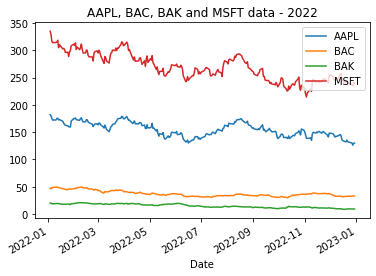

In [46]:
tickers = ['BAC', 'BAK','AAPL','MSFT']
data= yf.download(tickers=tickers, start='2022-01-01', end ='2022-12-31')
data = data.drop(['Volume', 'Open', 'High', 'Low','Adj Close'], axis = 1)
data['Close'].plot(title="AAPL, BAC, BAK and MSFT data - 2022")

In [47]:
data=data['Close']
data.head()

,AAPL,BAC,BAK,MSFT
Date,,,,
2022-01-03 00:00:00-05:00,182.009995,46.180000,19.809999,334.750000
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009


**Individual Correlation**

In [48]:
r1=np.corrcoef(data['AAPL'], data['BAC'])
print('AAPL and BAC: Correlation is :',r1)

AAPL and BAC: Correlation is : [[1.         0.72909973]
 [0.72909973 1.        ]]


In [49]:
r2=np.corrcoef(data['AAPL'], data['BAK'])
print('AAPL and BAK: Correlation is :',r2)

AAPL and BAK: Correlation is : [[1.         0.61218109]
 [0.61218109 1.        ]]


In [50]:
r3=np.corrcoef(data['AAPL'], data['MSFT'])
print('AAPL and MSFT: Correlation is :',r3)

AAPL and MSFT: Correlation is : [[1.         0.86277488]
 [0.86277488 1.        ]]


In [51]:
r4=np.corrcoef(data['BAC'], data['BAK'])
print('BAC and BAK: Correlation is :',r4)

BAC and BAK: Correlation is : [[1.         0.76118896]
 [0.76118896 1.        ]]


In [52]:
r5=np.corrcoef(data['BAC'], data['MSFT'])
print('BAC and MSFT: Correlation is :',r5)

BAC and MSFT: Correlation is : [[1.         0.78468409]
 [0.78468409 1.        ]]


In [53]:
r6=np.corrcoef(data['BAK'], data['MSFT'])
print('BAK and MSFT: Correlation is :',r6)

BAK and MSFT: Correlation is : [[1.         0.79116033]
 [0.79116033 1.        ]]


In [54]:
df = pd.DataFrame()
df['security_1'] = ['AAPL','AAPL','AAPL','BAC','BAC','BAK']
df['security_2'] = ['BAC','BAK','MSFT','BAK','MSFT','MSFT']
df['correlation'] = [0.72909973, 0.61218109, 0.86277488, 0.76118896, 0.78468409, 0.79116033]
df

,security_1,security_2,correlation
0,AAPL,BAC,0.729100
1,AAPL,BAK,0.612181
2,AAPL,MSFT,0.862775
3,BAC,BAK,0.761189
4,BAC,MSFT,0.784684
5,BAK,MSFT,0.791160


**VAR**

In [55]:
n_lag = 1

# Extract column names
equities = data.columns
print(equities)

# Loop through each lags
for i in range(1, n_lag + 1):
    
    # Loop through each features
    for j in equities:
        
        # Add lag i of feature j to the dataframe
        data[f"{j}_Lag_{i}"] = data[j].shift(i) #assigning this was may cause some warnings

Index(['AAPL', 'BAC', 'BAK', 'MSFT'], dtype='object')


In [56]:
data.head()

,AAPL,BAC,BAK,MSFT,AAPL_Lag_1,BAC_Lag_1,BAK_Lag_1,MSFT_Lag_1
Date,,,,,,,,
2022-01-03 00:00:00-05:00,182.009995,46.180000,19.809999,334.750000,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,182.009995,46.180000,19.809999,334.750000
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,179.699997,47.990002,19.780001,329.010010
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,174.919998,47.180000,18.780001,316.380005
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,172.000000,48.130001,18.580000,313.880005


Dropping NaNs

In [57]:
data = data.dropna()

In [58]:
data

,AAPL,BAC,BAK,MSFT,AAPL_Lag_1,BAC_Lag_1,BAK_Lag_1,MSFT_Lag_1
Date,,,,,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,182.009995,46.180000,19.809999,334.750000
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,179.699997,47.990002,19.780001,329.010010
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,174.919998,47.180000,18.780001,316.380005
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,172.000000,48.130001,18.580000,313.880005
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989,172.169998,49.180000,18.700001,314.040009
...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,131.860001,32.470001,9.290000,238.729996,132.229996,32.389999,8.990000,238.190002
2022-12-27 00:00:00-05:00,130.029999,32.529999,9.090000,236.960007,131.860001,32.470001,9.290000,238.729996
2022-12-28 00:00:00-05:00,126.040001,32.770000,9.150000,234.529999,130.029999,32.529999,9.090000,236.960007


**Further processing the data**

You can see, we now have our "Design matrix" with the two equities. But, the $\mathbf{X_t}$ matrix is embedded in the first two columns. Let's seperate out our $\mathbf{X_t}$ matrix from out $\mathbf{X_{t-1\ldots t-k-1}}$ matrix.

In [59]:
data_x_t = data[['AAPL','BAC', 'BAK','MSFT']]
print(data_x_t.head())
data_design=data.drop(['AAPL','BAC', 'BAK','MSFT'],axis=1)
print(data_design.head())

                                 AAPL        BAC        BAK        MSFT
Date                                                                   
2022-01-04 00:00:00-05:00  179.699997  47.990002  19.780001  329.010010
2022-01-05 00:00:00-05:00  174.919998  47.180000  18.780001  316.380005
2022-01-06 00:00:00-05:00  172.000000  48.130001  18.580000  313.880005
2022-01-07 00:00:00-05:00  172.169998  49.180000  18.700001  314.040009
2022-01-10 00:00:00-05:00  172.190002  48.930000  18.879999  314.269989
                           AAPL_Lag_1  BAC_Lag_1  BAK_Lag_1  MSFT_Lag_1
Date                                                                   
2022-01-04 00:00:00-05:00  182.009995  46.180000  19.809999  334.750000
2022-01-05 00:00:00-05:00  179.699997  47.990002  19.780001  329.010010
2022-01-06 00:00:00-05:00  174.919998  47.180000  18.780001  316.380005
2022-01-07 00:00:00-05:00  172.000000  48.130001  18.580000  313.880005
2022-01-10 00:00:00-05:00  172.169998  49.180000  18.700001  314

In [60]:
C=np.linalg.inv(data_design.T @ data_design) @ data_design.T @ data_x_t

In [61]:
print("our least-squares Co-efficient matrix is \n",C)

our least-squares Co-efficient matrix is 
        AAPL       BAC       BAK      MSFT
0  0.932684 -0.002214 -0.004017 -0.037738
1  0.053314  0.991839  0.007061  0.145848
2 -0.110855 -0.007662  0.978476 -0.094651
3  0.036641  0.002610  0.002371  1.005031


**Making predictions**

Now we have our co-efficient matrix $\mathbf{C}$, we can use this to make predictions on our data. Let's use the first month of 2022 to see how we do. 

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:title={'center':'AAPL, BAC, BAK and MSFT data - January 2022'}, xlabel='Date'>

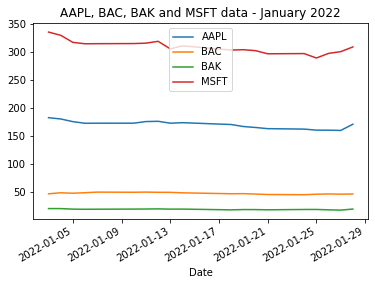

In [62]:
test= yf.download(tickers=tickers, start='2022-01-01', end ='2022-01-31')
test = test.drop(['Volume', 'Open', 'High', 'Low','Adj Close'], axis = 1)
test['Close'].plot(title="AAPL, BAC, BAK and MSFT data - January 2022")

In [63]:
test=test['Close']

In [64]:
test.head()

,AAPL,BAC,BAK,MSFT
Date,,,,
2022-01-03 00:00:00-05:00,182.009995,46.180000,19.809999,334.750000
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009


In [65]:
prediction = C @ test.T
prediction_t = prediction.T
prediction_t.head()

,0,1,2,3
Date,,,,
2022-01-03 00:00:00-05:00,156.943239,104.469467,-32.831520,343.270470
2022-01-04 00:00:00-05:00,155.001469,105.304163,-32.075369,337.421617
2022-01-05 00:00:00-05:00,151.025680,102.396804,-31.322304,324.548447
2022-01-06 00:00:00-05:00,148.395289,102.817341,-30.964954,321.930885
2022-01-07 00:00:00-05:00,148.544998,103.892019,-30.889572,322.100947


In [66]:
test['AAPL pred']=prediction_t[0].shift()
test['BAC pred']=prediction_t[1].shift()
test['BAK pred']=prediction_t[2].shift()
test['MSFT pred']=prediction_t[3].shift()

test = test.dropna()
test.head()

,AAPL,BAC,BAK,MSFT,AAPL pred,BAC pred,BAK pred,MSFT pred
Date,,,,,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,156.943239,104.469467,-32.831520,343.270470
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,155.001469,105.304163,-32.075369,337.421617
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,151.025680,102.396804,-31.322304,324.548447
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,148.395289,102.817341,-30.964954,321.930885
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989,148.544998,103.892019,-30.889572,322.100947


**Basic error analysis**

To compute raw error, MSE, and RMSE for the results:

In [67]:
test['AAPL err'] = test['AAPL']-test['AAPL pred']
test['BAC err'] = test['BAC']-test['BAC pred']
test['BAK err'] = test['BAK']-test['BAK pred']
test['MSFT err'] = test['MSFT']-test['MSFT pred']
test.head()

,AAPL,BAC,BAK,MSFT,AAPL pred,BAC pred,BAK pred,MSFT pred,AAPL err,BAC err,BAK err,MSFT err
Date,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,156.943239,104.469467,-32.831520,343.270470,22.756758,-56.479466,52.611521,-14.260461
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,155.001469,105.304163,-32.075369,337.421617,19.918529,-58.124162,50.855370,-21.041612
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,151.025680,102.396804,-31.322304,324.548447,20.974320,-54.266803,49.902304,-10.668442
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,148.395289,102.817341,-30.964954,321.930885,23.774710,-53.637341,49.664955,-7.890876
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989,148.544998,103.892019,-30.889572,322.100947,23.645005,-54.962019,49.769571,-7.830958


In [68]:
test['AAPL err^2']=test['AAPL err']**2
test['BAC err^2']=test['BAC err']**2
test['BAK err^2']=test['BAK err']**2
test['MSFT err^2']=test['MSFT err']**2
test.head()

,AAPL,BAC,BAK,MSFT,AAPL pred,BAC pred,BAK pred,MSFT pred,AAPL err,BAC err,BAK err,MSFT err,AAPL err^2,BAC err^2,BAK err^2,MSFT err^2
Date,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,156.943239,104.469467,-32.831520,343.270470,22.756758,-56.479466,52.611521,-14.260461,517.870025,3189.930029,2767.972142,203.360734
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,155.001469,105.304163,-32.075369,337.421617,19.918529,-58.124162,50.855370,-21.041612,396.747813,3378.418247,2586.268660,442.749434
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,151.025680,102.396804,-31.322304,324.548447,20.974320,-54.266803,49.902304,-10.668442,439.922084,2944.885858,2490.239955,113.815657
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,148.395289,102.817341,-30.964954,321.930885,23.774710,-53.637341,49.664955,-7.890876,565.236817,2876.964361,2466.607757,62.265931
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989,148.544998,103.892019,-30.889572,322.100947,23.645005,-54.962019,49.769571,-7.830958,559.086243,3020.823499,2477.010165,61.323907


In [69]:
print('AAPL MSE = ',np.mean(test['AAPL err^2']))
print('BAC MSE = ',np.mean(test['BAC err^2']))
print('AAPL MSE = ',np.mean(test['AAPL err^2']))
print('MSFT MSE = ',np.mean(test['MSFT err^2']))

AAPL MSE =  520.4378726838764
BAC MSE =  2900.7088199567106
AAPL MSE =  520.4378726838764
MSFT MSE =  128.5058604853092


In [70]:
print('AAPL RMSE = ',np.sqrt(np.mean(test['AAPL err^2'])))
print('BAC RMSE = ',np.sqrt(np.mean(test['BAC err^2'])))
print('BAK RMSE = ',np.sqrt(np.mean(test['BAK err^2'])))
print('MSFT RMSE = ',np.sqrt(np.mean(test['MSFT err^2'])))

AAPL RMSE =  22.813107475393974
BAC RMSE =  53.85822889732553
BAK RMSE =  48.754766461690956
MSFT RMSE =  11.33604254073304


**Evaluation**

Did our VAR do any better than an AR model? We can check using both AR(1) and AR(2) models using statsmodel implementation, since we used two parameters in our derivation of VAR. 

In [71]:
from statsmodels.tsa.arima.model import ARIMA

ar1_aapl = ARIMA(data_x_t['AAPL'], order=(1,0,0))
ar2_aapl = ARIMA(data_x_t['AAPL'], order=(2,0,0))

ar1_bac = ARIMA(data_x_t['BAC'], order=(1,0,0))
ar2_bac = ARIMA(data_x_t['BAC'], order=(2,0,0))

ar1_bak = ARIMA(data_x_t['BAK'], order=(1,0,0))
ar2_bak = ARIMA(data_x_t['BAK'], order=(2,0,0))

ar1_msft = ARIMA(data_x_t['MSFT'], order=(1,0,0))
ar2_msft = ARIMA(data_x_t['MSFT'], order=(2,0,0))

ar1_aapl_fit=ar1_aapl.fit()
ar2_aapl_fit=ar2_aapl.fit()

ar1_bac_fit=ar1_bac.fit()
ar2_bac_fit=ar2_bac.fit()

ar1_bak_fit=ar1_bak.fit()
ar2_bak_fit=ar2_bak.fit()

ar1_msft_fit=ar1_msft.fit()
ar2_msft_fit=ar2_msft.fit()

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

To check the AR models without making too many columns in our results dataframe, let's create a new AR results dataframe:

In [72]:
ar_df = test[['AAPL','BAC','BAK','MSFT']]
ar_df.head()

,AAPL,BAC,BAK,MSFT
Date,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989


Using an AR model, we can only forcast $p$ days ahead. We can instead apply the model to unseen data using the apply() method:

In [73]:
res1 = ar1_aapl_fit.apply(ar_df['AAPL'])
res2 = ar2_aapl_fit.apply(ar_df['AAPL'])
res3 = ar1_bac_fit.apply(ar_df['BAC'])
res4 = ar2_bac_fit.apply(ar_df['BAC'])
res5 = ar1_bak_fit.apply(ar_df['BAK'])
res6 = ar2_bak_fit.apply(ar_df['BAK'])
res7 = ar1_msft_fit.apply(ar_df['MSFT'])
res8 = ar2_msft_fit.apply(ar_df['MSFT'])
ar_df['AAPL AR1']=res1.fittedvalues
ar_df['AAPL AR2']=res2.fittedvalues
ar_df['BAC AR1']=res3.fittedvalues
ar_df['BAC AR2']=res4.fittedvalues
ar_df['BAK AR1']=res5.fittedvalues
ar_df['BAK AR2']=res6.fittedvalues
ar_df['MSFT AR1']=res7.fittedvalues
ar_df['MSFT AR2']=res8.fittedvalues
ar_df.head()

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

,AAPL,BAC,BAK,MSFT,AAPL AR1,AAPL AR2,BAC AR1,BAC AR2,BAK AR1,BAK AR2,MSFT AR1,MSFT AR2
Date,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,154.727934,154.726929,38.992210,38.770491,14.658423,14.650486,273.205250,273.325737
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,179.053404,179.053822,47.927544,47.923073,19.746521,19.746689,327.927857,327.941324
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,174.397172,174.403114,47.123165,47.020961,18.753058,18.768895,315.542770,315.879859
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,171.552781,171.556623,48.066571,48.161285,18.554364,18.557932,313.091250,313.181150
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989,171.718377,171.718958,49.109282,49.214054,18.673581,18.672269,313.248151,313.273686


To compute the squared error for each result:

In [74]:
ar_df['AAPL AR1 sqerr']=(ar_df['AAPL']-ar_df['AAPL AR1'])**2
ar_df['AAPL AR2 sqerr']=(ar_df['AAPL']-ar_df['AAPL AR2'])**2

ar_df['BAC AR1 sqerr']=(ar_df['BAC']-ar_df['BAC AR1'])**2
ar_df['BAC AR2 sqerr']=(ar_df['BAC']-ar_df['BAC AR2'])**2

ar_df['BAK AR1 sqerr']=(ar_df['BAK']-ar_df['BAK AR1'])**2
ar_df['BAK AR2 sqerr']=(ar_df['BAK']-ar_df['BAK AR2'])**2

ar_df['MSFT AR1 sqerr']=(ar_df['MSFT']-ar_df['MSFT AR1'])**2
ar_df['MSFT AR2 sqerr']=(ar_df['MSFT']-ar_df['MSFT AR2'])**2
ar_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22796\2782466324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_df['AAPL AR1 sqerr']=(ar_df['AAPL']-ar_df['AAPL AR1'])**2
C:\Users\User\AppData\Local\Temp\ipykernel_22796\2782466324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_df['AAPL AR2 sqerr']=(ar_df['AAPL']-ar_df['AAPL AR2'])**2
C:\Users\User\AppData\Local\Temp\ipykernel_22796\2782466324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,AAPL,BAC,BAK,MSFT,AAPL AR1,AAPL AR2,BAC AR1,BAC AR2,BAK AR1,BAK AR2,MSFT AR1,MSFT AR2,AAPL AR1 sqerr,AAPL AR2 sqerr,BAC AR1 sqerr,BAC AR2 sqerr,BAK AR1 sqerr,BAK AR2 sqerr,MSFT AR1 sqerr,MSFT AR2 sqerr
Date,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,179.699997,47.990002,19.780001,329.010010,154.727934,154.726929,38.992210,38.770491,14.658423,14.650486,273.205250,273.325737,623.603912,623.654145,80.960260,84.999373,26.230560,26.311922,3114.171180,3100.738266
2022-01-05 00:00:00-05:00,174.919998,47.180000,18.780001,316.380005,179.053404,179.053822,47.927544,47.923073,19.746521,19.746689,327.927857,327.941324,17.085045,17.088496,0.558821,0.552157,0.934161,0.934486,133.352896,133.664095
2022-01-06 00:00:00-05:00,172.000000,48.130001,18.580000,313.880005,174.397172,174.403114,47.123165,47.020961,18.753058,18.768895,315.542770,315.879859,5.746435,5.774959,1.013719,1.229969,0.029949,0.035681,2.764789,3.999418
2022-01-07 00:00:00-05:00,172.169998,49.180000,18.700001,314.040009,171.552781,171.556623,48.066571,48.161285,18.554364,18.557932,313.091250,313.181150,0.380958,0.376229,1.239724,1.037781,0.021210,0.020184,0.900143,0.737638
2022-01-10 00:00:00-05:00,172.190002,48.930000,18.879999,314.269989,171.718377,171.718958,49.109282,49.214054,18.673581,18.672269,313.248151,313.273686,0.222431,0.221883,0.032142,0.080686,0.042609,0.043152,1.044153,0.992620


The 1st row of values looks off (in comparison to the rest of the rows), so we can disregard it and compute each security's MSE.

In [75]:
print("AAPL AR1 MSE =",np.mean(ar_df["AAPL AR1 sqerr"]))
print("AAPL AR2 MSE =",np.mean(ar_df["AAPL AR2 sqerr"]))

print("BAC AR1 MSE =",np.mean(ar_df["BAC AR1 sqerr"]))
print("BAC AR2 MSE =",np.mean(ar_df["BAC AR2 sqerr"]))

print("BAK AR1 MSE =",np.mean(ar_df["BAK AR1 sqerr"]))
print("BAK AR2 MSE =",np.mean(ar_df["BAK AR2 sqerr"]))

print("MSFT AR1 MSE =",np.mean(ar_df["MSFT AR1 sqerr"]))
print("MSFT AR2 MSE =",np.mean(ar_df["MSFT AR2 sqerr"]))

AAPL AR1 MSE = 45.63334307672994
AAPL AR2 MSE = 45.63916252339071
BAC AR1 MSE = 4.987432057674128
BAC AR2 MSE = 5.199829673364508
BAK AR1 MSE = 1.9102156604689118
BAK AR2 MSE = 1.9121312655805527
MSFT AR1 MSE = 208.9978752341233
MSFT AR2 MSE = 207.88954666931087


To compare with our VAR predictions:

In [76]:
print('AAPL MSE = ',np.mean(test['AAPL err^2']))
print('BAC MSE = ',np.mean(test['BAC err^2']))
print('BAK MSE = ',np.mean(test['BAK err^2']))
print('MSFT MSE = ',np.mean(test['MSFT err^2']))

AAPL MSE =  520.4378726838764
BAC MSE =  2900.7088199567106
BAK MSE =  2377.0272527340253
MSFT MSE =  128.5058604853092


All equities have a bigger error when using VAR.

In [77]:
df

,security_1,security_2,correlation
0,AAPL,BAC,0.729100
1,AAPL,BAK,0.612181
2,AAPL,MSFT,0.862775
3,BAC,BAK,0.761189
4,BAC,MSFT,0.784684
5,BAK,MSFT,0.791160


## Data Smoothing
Smoothing is a technique used to reduce the noise or random fluctuations in data. The main objective of smoothing is to remove the unwanted noise or variations in the data and make the underlying patterns and trends more visible.  There are various types of smoothing techniques available, including simple moving average, weighted moving average, median filtering, and more.  In the following section we will be discussing about exponential smoothing, convolution smoothing, and LOWESS (locally weighted scatterplot smoothing).

### Type 1. Exponential Smoothing 

Exponential smoothing is a technique used for smoothing out a time series data set by applying a weight to each data point.  In exponential smoothing, the term "exponential" refers to the way in which the model weights the data points in the time series. The model assigns exponentially decreasing weights to older data points, with the most recent data points receiving the highest weight. This is in contrast to other smoothing methods, such as moving averages, which assign equal weights to all data points within a certain window of time. The exponential smoothing model uses a smoothing parameter, also called alpha, which determines the degree to which the model weights the most recent data points.

The formula for exponential smoothing is: s(t) = α * y(t) + (1 - α) * s(t-1)

Where:

s(t) is the smoothed value at time step t

y(t) is the raw value at time step t

s(t-1) is the previous smoothed value

α (alpha) is the smoothing factor, a value between 0 and 1 that determines the weight given to the most recent observation. 

A higher value of α gives more weight to the most recent observation and a lower value of α gives more weight to the previous observations.

Lets us calculate the smoothed values for data set [10 18 29 15 30 12 16] where 𝛼 = 0.3:

Start by setting t = 1, s0 = 0 (initial value)
𝑠1 = 𝛼 * 10 + (1 - 𝛼) * 0 = (0.3) * 10 + (0.7) * 0 = 3

𝑠2 = 𝛼 * 18 + (1 - 𝛼) * 3 = (0.3) * 18 + (0.7) * 3 = 5.4

𝑠3 = 𝛼 * 29 + (1 - 𝛼) * 5.4 = (0.3) * 29 + (0.7) * 5.4 = 11.22

𝑠4 = 𝛼 * 15 + (1 - 𝛼) * 11.22 = (0.3) * 15 + (0.7) * 11.22 = 12.66

𝑠5 = 𝛼 * 30 + (1 - 𝛼) * 12.66 = (0.3) * 30 + (0.7) * 12.66 = 20.58

𝑠6 = 𝛼 * 12 + (1 - 𝛼) * 20.58 = (0.3) * 12 + (0.7) * 20.58 = 16.374

𝑠7 = 𝛼 * 16 + (1 - 𝛼) * 16.374 = (0.3) * 16 + (0.7) * 16.374 = 15.922

So the smoothed values for the data set [10 18 29 15 30 12 16] with 𝛼 = 0.3

It's important to note that the smoothed values are dependent on the value of alpha and the initial value, so the result could be different if the value of alpha or initial value are changed.


### Sample Code

Let us compute the smoothed data for the data set [10,2,5,12,15,6,5,16,20,22,26] using Exponential smoothing.

In [78]:
# Example
# Define the data set
data = [10,2,5,12,15,6,5,16,20,22,26]

# Specify the smoothing factor (alpha)
alpha = 1/3

# Initialize the smoothed data with the first data point
smoothed_data = [data[0]]

# Iterate over the data set and calculate the smoothed data
for i in range(1, len(data)):
    smoothed_data.append(alpha * data[i] + (1 - alpha) * smoothed_data[i-1])

print("Original")
data

Original


[10, 2, 5, 12, 15, 6, 5, 16, 20, 22, 26]

In [79]:
print("Smoothed")
smoothed_data

Smoothed


[10,
 7.333333333333335,
 6.555555555555557,
 8.370370370370372,
 10.580246913580249,
 9.053497942386834,
 7.702331961591224,
 10.468221307727482,
 13.645480871818322,
 16.430320581212214,
 19.620213720808145]

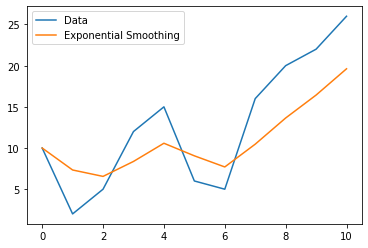

In [80]:
import matplotlib.pyplot as plt
plt.plot(data, label='Data')
plt.plot(smoothed_data, label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()

## Compute the exponential smoothing for the Apple (AAPL) stock price between 2021-01-01 and 2021-03-31


In [81]:
!pip install yfinance
import yfinance as yf

In [82]:
# Define the data set
ticker = yf.Ticker('AAPL')
data = ticker.history(start="2021-01-01", end="2021-03-31", interval="1d") #https://algotrading101.com/learn/yfinance-guide/

# Specify the smoothing factor (alpha)
alpha = 1/3

# # Initialize the smoothed data with the first data point
smoothed_data = [data['Close'][0]]

# # Iterate over the data set and calculate the smoothed data
for i in range(1, len(data['Close'])):
     smoothed_data.append(alpha * data['Close'][i] + (1 - alpha) * smoothed_data[i-1])

print("Original")
ori_data =[]
for i in range(0, len(data['Close'])):
     ori_data.append(data['Close'][i])

ori_data

Original


[127.5036392211914,
 129.08004760742188,
 124.73503112792969,
 128.99139404296875,
 130.104736328125,
 127.07997131347656,
 126.90262603759766,
 128.96182250976562,
 127.0110092163086,
 125.26708984375,
 125.94690704345703,
 130.08502197265625,
 134.85372924804688,
 137.02133178710938,
 140.81460571289062,
 141.0510711669922,
 139.96725463867188,
 135.07046508789062,
 130.01608276367188,
 132.16395568847656,
 133.00144958496094,
 131.96690368652344,
 135.3660888671875,
 134.94671630859375,
 135.09474182128906,
 134.20664978027344,
 133.5948944091797,
 133.33831787109375,
 133.57513427734375,
 131.42405700683594,
 129.1051788330078,
 127.99018859863281,
 128.1480712890625,
 124.32938385009766,
 124.19124603271484,
 123.68799591064453,
 119.38581085205078,
 119.65222930908203,
 126.09564971923828,
 123.46105194091797,
 120.44161224365234,
 118.53720092773438,
 119.81011199951172,
 114.81719970703125,
 119.48448181152344,
 118.38919830322266,
 120.34294128417969,
 119.42527770996094,
 122

In [83]:
print("Smoothed")
smoothed_data

Smoothed


[127.5036392211914,
 128.02910868326825,
 126.93108283148874,
 127.61785323531542,
 128.44681426625195,
 127.99119994866015,
 127.628341978306,
 128.07283548879255,
 127.71889339796456,
 126.90162554655971,
 126.58338604552549,
 127.75059802123576,
 130.11830843017282,
 132.41931621581836,
 135.2177460481758,
 137.16218775444793,
 138.09721004918924,
 137.0882950620897,
 134.7308909626171,
 133.87524587123693,
 133.58398044247826,
 133.04495485716,
 133.81866619383584,
 134.19468289875516,
 134.4947025395998,
 134.3986849531577,
 134.1307547718317,
 133.8666091382524,
 133.76945085128284,
 132.9876529031339,
 131.69349487975853,
 130.45905945271664,
 129.68873006483193,
 127.90228132658717,
 126.66526956196307,
 125.67284501152356,
 123.57716695836598,
 122.26885440860467,
 123.54445284548255,
 123.51665254396103,
 122.4916391105248,
 121.17349304959467,
 120.71903269956702,
 118.75175503538844,
 118.9959972941001,
 118.79373096380763,
 119.31013440393167,
 119.34851550594144,
 120.347

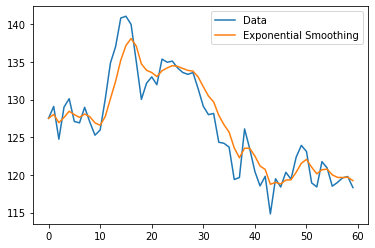

In [84]:
import matplotlib.pyplot as plt
plt.plot(ori_data, label='Data')
plt.plot(smoothed_data, label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()

### Type 2. Lowess Smooting 

LOWESS (Locally Weighted Scatterplot Smoothing), sometimes called LOESS (locally weighted smoothing), is used in regression analysis that creates a smooth line to each data point, weighted by the distance from the point to its neighbors  that helps to see the relationship between the trends an variables.

Lowess smoothing is useful in situations where a linear regression model is not appropriate, such as when the data points have high variability or when the relationship between the independent and dependent variables is nonlinear.

The formula for LOWESS smoothing is: sk=β0tk−1 + β1tk + β2tk+1

betas can be 1/3

The total data points are divided into smaller sets using the sliding window size of 4 to 5.  Then, weighted least squares are applied to fit a line for the data points within the sliding window as shown in the diagram below.  The larger the window size, the more data points are included in the average, leading to a smoother curve.

Weights are numbers assigned to each data point to determine the degree to which that data point contributes to the smoothed line.  These weights are usually calculated based on the distance of the data point from the other points.  Higher weight will be assigned to the data point closer to the focal data point.  The weights are then used to calculate a weighted average of the data points to smooth out the data.

Outliers are points that are not close to the line or curve produced by the Lowess smoothing algorithm, and thus stand out from the other data points.  Ignored point is a data point that is not used in the smoothing process. This is usually done to reduce the impact of outliers or data points that may be far from the general trend of the data.

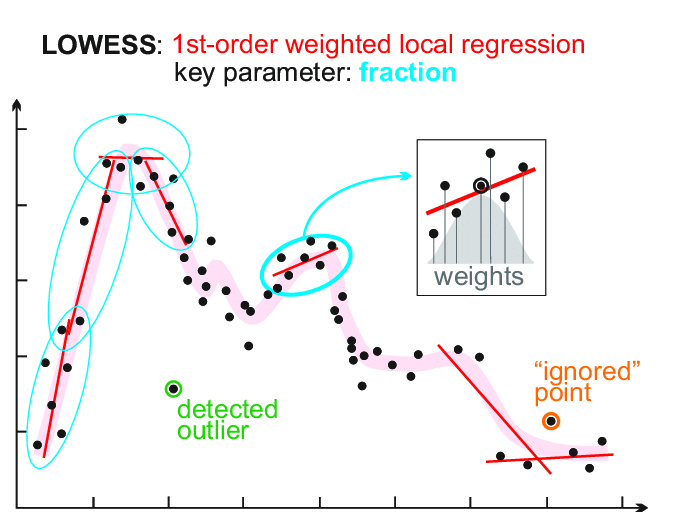

Source: https://www.researchgate.net/figure/Principles-of-LOWESS-locally-weighted-scatterplot-smoothing-method-for-a-1st-order_fig3_342187654

### Sample Code

In [85]:
#define timeseries data
data = [10,2,5,12,15,6,5,16,20,22,26]

#define betas 
betas = 1/3

#define list to store smoothed values
smoothed_data=[]

#initialize smoothed value with first value
smoothed_data.append(data[0])

#Calculating the Convolution Smoothing
for i in range(1,len(data)-1):
    smoothed_data.append((data[i-1] + data[i] + data[i+1])/3)

#print the smoothed values
print("Original data")
data

Original data


[10, 2, 5, 12, 15, 6, 5, 16, 20, 22, 26]

In [86]:
print("smoothed_data")
smoothed_data

smoothed_data


[10,
 5.666666666666667,
 6.333333333333333,
 10.666666666666666,
 11.0,
 8.666666666666666,
 9.0,
 13.666666666666666,
 19.333333333333332,
 22.666666666666668]

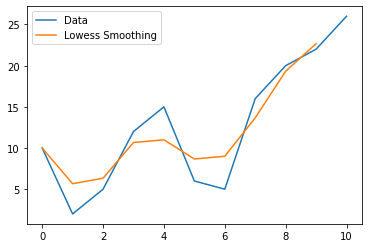

In [87]:
plt.plot(data, label='Data')
plt.plot(smoothed_data, label='Lowess Smoothing')
plt.legend(loc='best')
plt.show()

## Compute the Lowess smoothing for the Apple (AAPL) stock price between 2021-01-01 and 2021-03-31


In [88]:
#define timeseries data
ticker = yf.Ticker('AAPL')
data = ticker.history(start="2021-01-01", end="2021-03-31", interval="1d") #https://algotrading101.com/learn/yfinance-guide/

#define betas 
betas = 1/3

#define list to store smoothed values
smoothed_data=[]

#initialize smoothed value with first value
smoothed_data.append(data['Close'][0])

#Calculating the Convolution Smoothing
for i in range(1,len(data['Close'])-1):
    smoothed_data.append((data['Close'][i-1] + data['Close'][i] + data['Close'][i+1])/3)

#print the smoothed values
print("Original data")
ori_data =[]
for i in range(0, len(data['Close'])):
     ori_data.append(data['Close'][i])

ori_data

Original data


[127.50364685058594,
 129.08004760742188,
 124.73503875732422,
 128.99139404296875,
 130.10476684570312,
 127.07999420166016,
 126.90262603759766,
 128.96182250976562,
 127.01101684570312,
 125.26708221435547,
 125.9468994140625,
 130.0850372314453,
 134.8537139892578,
 137.02134704589844,
 140.8146209716797,
 141.05108642578125,
 139.96730041503906,
 135.07049560546875,
 130.0160675048828,
 132.16395568847656,
 133.00144958496094,
 131.96690368652344,
 135.3660888671875,
 134.9467010498047,
 135.09471130371094,
 134.20664978027344,
 133.5948944091797,
 133.3383331298828,
 133.57513427734375,
 131.4240264892578,
 129.10519409179688,
 127.99019622802734,
 128.1480712890625,
 124.32937622070312,
 124.19123840332031,
 123.68799591064453,
 119.38579559326172,
 119.6522216796875,
 126.09564208984375,
 123.46105194091797,
 120.4416275024414,
 118.5372085571289,
 119.81009674072266,
 114.81719207763672,
 119.48446655273438,
 118.38921356201172,
 120.34295654296875,
 119.42527770996094,
 122.3

In [89]:
print("smoothed_data")
smoothed_data

smoothed_data


[127.50364685058594,
 127.10624440511067,
 127.60216013590495,
 127.94373321533203,
 128.7253850301107,
 128.0291290283203,
 127.64814758300781,
 127.62515513102214,
 127.07997385660808,
 126.0749994913737,
 127.09967295328777,
 130.29521687825522,
 133.98669942220053,
 137.56322733561197,
 139.62901814778647,
 140.61100260416666,
 138.69629414876303,
 135.01795450846353,
 132.41683959960938,
 131.72715759277344,
 132.37743631998697,
 133.44481404622397,
 134.09323120117188,
 135.13583374023438,
 134.74935404459634,
 134.2987518310547,
 133.71329243977866,
 133.5027872721354,
 132.77916463216147,
 131.3681182861328,
 129.506472269694,
 128.41448720296225,
 126.82254791259766,
 125.55622863769531,
 124.06953684488933,
 122.42167663574219,
 120.90867106119792,
 121.71121978759766,
 123.06963857014973,
 123.33277384440105,
 120.81329600016277,
 119.59631093343098,
 117.72149912516277,
 118.03725179036458,
 117.56362406412761,
 119.40554555257161,
 119.3858159383138,
 120.70475260416667,
 

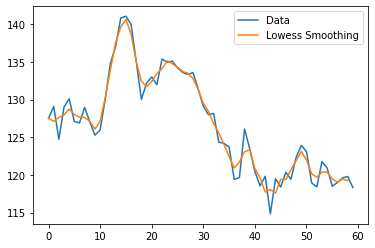

In [90]:
plt.plot(ori_data, label='Data')
plt.plot(smoothed_data, label='Lowess Smoothing')
plt.legend(loc='best')
plt.show()

### Type 3. Convolution smoothing

Convolution smoothing in time series is a way to smooth out the ups and downs of a time series by taking an average of nearby data points. Imagine you have a line graph that shows how something changes over time, such as the temperature or the stock market. Sometimes this line goes up and down a lot, making it hard to see the overall pattern.
Convolution smoothing works by looking at small chunks, or "windows", of data at a time. It takes the average of all the data points within each window and replaces the original data points with these averages. The size of the window can be adjusted to control how much smoothing is applied. The result is a new line graph that is less jagged and shows the overall pattern more clearly.

The formula is typically applied to a time series of data points to reduce the amount of noise or irregularities within the data.

Formula: $𝑠_{𝑘} =\beta_0 𝑡_{𝑘} + \beta_1 𝑡_{𝑘 −1} +\beta_2 𝑡_{𝑘 −2}$
Where Betas = 1/3

Example:

If the stock price of IBM today is 100, the stock price from the previous day is 90, and the stock price from two days prior is 80, then the smoothing is calculated as

S = (1/3) × 100 + (1/3) × 90 + (1/3) × 80 

S = (1/3) × (100 + 90 + 80) 

S = (1/3) × (270) 

S = 90

### Sample Code

In [91]:
#Creating the timeseries data
#data = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
data = [10,2,5,12,15,6,5,16,20,22,26]
#data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#Initializing the Convolution Smoothing formula
smoothed_data = []

#Calculating the Convolution Smoothing
for i in range(1,len(data)-1):
    smoothed_data.append((data[i-1] + data[i] + data[i-2])/3)

print("Original Data:")
data

Original Data:


[10, 2, 5, 12, 15, 6, 5, 16, 20, 22, 26]

In [92]:
print("Convolution Smoothing:")
smoothed_data

Convolution Smoothing:


[12.666666666666666,
 5.666666666666667,
 6.333333333333333,
 10.666666666666666,
 11.0,
 8.666666666666666,
 9.0,
 13.666666666666666,
 19.333333333333332]

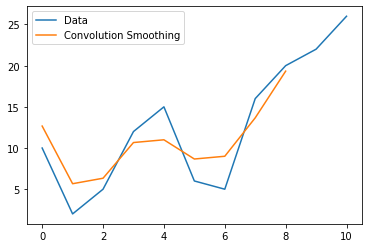

In [93]:
plt.plot(data, label='Data')
plt.plot(smoothed_data, label='Convolution Smoothing')
plt.legend(loc='best')
plt.show()

Compute the convolution smoothing for the APPL stock data between 2021-01-01 and 2021-03-31.

In [94]:
#Creating the timeseries data
ticker = yf.Ticker('AAPL')
data = ticker.history(start="2021-01-01", end="2021-03-31", interval="1d") #https://algotrading101.com/learn/yfinance-guide/

#Initializing the Convolution Smoothing formula
smoothed_data = []

#Calculating the Convolution Smoothing
for i in range(1,len(data['Close'])-1):
    smoothed_data.append((data['Close'][i-1] + data['Close'][i] + data['Close'][i-2])/3)

print("Original Data:")
ori_data =[]
for i in range(0, len(data['Close'])):
     ori_data.append(data['Close'][i])

ori_data

Original Data:


[127.50366973876953,
 129.08006286621094,
 124.73503875732422,
 128.9914093017578,
 130.10472106933594,
 127.0799789428711,
 126.90262603759766,
 128.9618377685547,
 127.01097106933594,
 125.26707458496094,
 125.94691467285156,
 130.08505249023438,
 134.85372924804688,
 137.02133178710938,
 140.81460571289062,
 141.05108642578125,
 139.96728515625,
 135.07049560546875,
 130.01608276367188,
 132.16395568847656,
 133.00144958496094,
 131.96690368652344,
 135.3660888671875,
 134.94668579101562,
 135.0947265625,
 134.20664978027344,
 133.59486389160156,
 133.3383331298828,
 133.57513427734375,
 131.424072265625,
 129.10519409179688,
 127.99020385742188,
 128.1480712890625,
 124.32939910888672,
 124.19123840332031,
 123.68800354003906,
 119.38581085205078,
 119.65222930908203,
 126.09564208984375,
 123.4610595703125,
 120.44161224365234,
 118.5372085571289,
 119.81009674072266,
 114.81718444824219,
 119.48448181152344,
 118.38919830322266,
 120.34292602539062,
 119.42527770996094,
 122.3460

In [95]:
print("Convolution Smoothing:")
smoothed_data

Convolution Smoothing:


[124.96466573079427,
 127.10625712076823,
 127.60217030843098,
 127.94372304280598,
 128.72536977132162,
 128.02910868326822,
 127.64814758300781,
 127.6251449584961,
 127.07996114095052,
 126.07498677571614,
 127.0996805826823,
 130.29523213704428,
 133.98670450846353,
 137.56322224934897,
 139.6290079752604,
 140.61099243164062,
 138.6962890625,
 135.01795450846353,
 132.4168446858724,
 131.72716267903647,
 132.37743631998697,
 133.44481404622397,
 134.09322611490884,
 135.13583374023438,
 134.74935404459634,
 134.29874674479166,
 133.7132822672526,
 133.50277709960938,
 132.77917989095053,
 131.36813354492188,
 129.5064900716146,
 128.41448974609375,
 126.8225580851237,
 125.55623626708984,
 124.06954701741536,
 122.42168426513672,
 120.90868123372395,
 121.71122741699219,
 123.06964365641277,
 123.33277130126953,
 120.81329345703125,
 119.59630584716797,
 117.72149658203125,
 118.0372543334961,
 117.5636215209961,
 119.40553538004558,
 119.38580067952473,
 120.70474243164062,
 121.

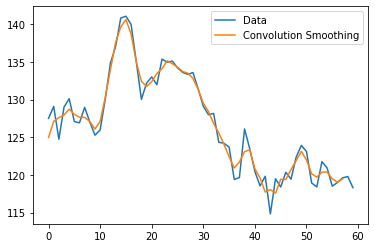

In [96]:
plt.plot(ori_data, label='Data')
plt.plot(smoothed_data, label='Convolution Smoothing')
plt.legend(loc='best')
plt.show()